# 分析泰坦尼克号的数据

## 哪些因素会让船上的人生存率更高

### 重点分析四个因素：船票等级（Pclass），性别（Sex），年龄（Age）以及是否有人陪伴（SibSp or Parch）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')

### 一、分析一下男性和女性的生存情况

Sex
female    233
male      109
Name: Survived, dtype: int64
Populating the interactive namespace from numpy and matplotlib


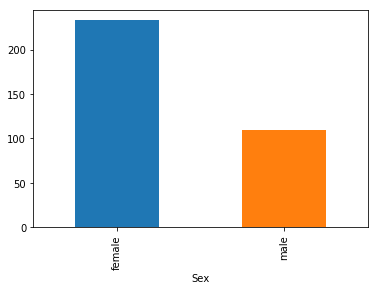

In [3]:
survived_sex = titanic_df.groupby('Sex')['Survived'].sum()
print survived_sex
%pylab inline
survived_sex.plot(kind='bar')

### 可以看出男性幸存数为109，女性幸存数为233，女性幸存人数几乎是男性的2倍

### 二、分析船票等级与生存情况的关系

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


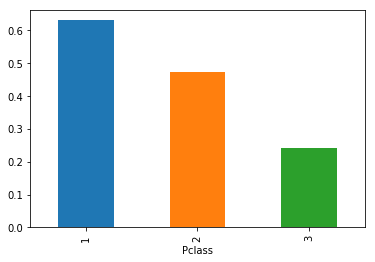

In [4]:
survived_Pclass = titanic_df.groupby('Pclass')['Survived'].sum() #购买不同等级船票的乘客中存活的人数
sum_Pclass = titanic_df.groupby('Pclass')['Name'].count() #购买不同等级船票的乘客总人数
rate_Pclass = survived_Pclass/sum_Pclass #购买不同等级船票的乘客的幸存比例
print rate_Pclass
rate_Pclass.plot(kind='bar')

### 可以看出头等舱的乘客存活比例最高，为0.629630

### 三、分析乘客年龄与幸存情况的关系

In [5]:
titanic_age = titanic_df.dropna(subset=['Age'])  #删除在Age列中含有空值的行

In [6]:
print titanic_age['Age'].max()
print titanic_age['Age'].min()

80.0
0.42


In [7]:
def convert_age(age):
    if age <= 80 and age >= 70:
        return '70-80'
    elif age < 70 and age >= 60:
        return '60-69'
    elif age < 60 and age >= 50:
        return '50-59'
    elif age < 50 and age >= 40:
        return '40-49'
    elif age < 40 and age >= 30:
        return '30-39'
    elif age < 30 and age >= 20:
        return '20-29'
    elif age < 20 and age >= 10:
        return '10-19'
    else:
        return '0-9'

In [8]:
converted_age = titanic_age['Age'].apply(convert_age)  #将乘客年龄分为不同的区间
type(converted_age)

pandas.core.series.Series

In [9]:
titanic_age['converted_age'] = converted_age

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


converted_age
0-9      0.612903
10-19    0.401961
20-29    0.350000
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-80    0.142857
Name: Survived, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


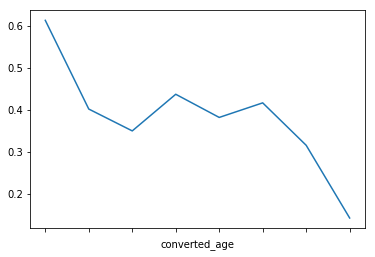

In [10]:
survived_on_age = titanic_age.groupby('converted_age')['Survived'].sum()  #不同年龄区间幸存人数
sum_on_age = titanic_age.groupby('converted_age')['Survived'].count()  #不同年龄区间总人数
rate_on_age = survived_on_age / sum_on_age  #不同年龄区间得幸存率
print rate_on_age
print type(rate_on_age)
rate = pd.Series(rate_on_age)
print type(rate)
rate_on_age.plot()

In [11]:
titanic_age_range = titanic_age.groupby('converted_age').sum().reset_index()  #将依据年龄区间分组的数据重新生成DataFrame

In [12]:
titanic_age_range = titanic_age_range.drop(['PassengerId', 'Pclass', 'Age', 'Fare'], axis=1)  #删除不需要的列

In [13]:
array_rate = rate_on_age.as_matrix()  #Series to Array

In [14]:
from pandas import Series, DataFrame
survived_rate = DataFrame(array_rate, columns=['Survived_rate'])  #Array to DataFrame

In [15]:
titanic_age_range = titanic_age_range.merge(survived_rate, left_index=True, right_index=True)  #添加幸存率

In [16]:
print titanic_age_range

  converted_age  Survived  SibSp  Parch  Survived_rate
0           0-9        38    115     87       0.612903
1         10-19        41     68     48       0.401961
2         20-29        77     71     55       0.350000
3         30-39        73     59     55       0.437126
4         40-49        34     33     42       0.382022
5         50-59        20     14     13       0.416667
6         60-69         6      5      7       0.315789
7         70-80         1      1      1       0.142857


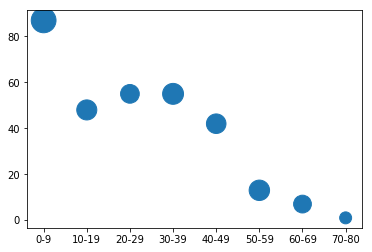

In [17]:
plt.scatter(titanic_age_range['converted_age'], titanic_age_range['Parch'], s=titanic_age_range['Survived_rate']*1000)

### 9岁以下儿童幸存率最高，10岁至59岁的人幸存率基本一致，60岁以上的人幸存率较低

### 乘客年龄及船票价格的相关性

In [18]:
# 计算相关性的函数
def correlation(x, y):
    x_standardized = (x - x.mean())/x.std(ddof=0)
    y_standardized = (y - y.mean())/y.std(ddof=0)
    return (x_standardized * y_standardized).mean()

In [19]:
Pclass = titanic_age['Fare']
Age = titanic_age['Age']

In [20]:
correlation(Pclass, Age)

0.096066691769038884

### 乘客年龄和船票价格为正相关，但相关性不大